In [1]:
import pydicom
import numpy as np
import glob
import natsort
# from natsort import natsorted
import matplotlib.pyplot as plt

In [3]:
scans = [
    pydicom.dcmread(scan) 
    for scan in sorted(
        glob.glob('shoulder-ct-dcm/*.dcm'),
        key = lambda x: int(''.join(c for c in x if c.isdigit()))
    )
]
cube = np.stack([s.pixel_array for s in scans])

In [14]:
np.save('cube-full-460-512-512.npy', cube[::-1,...]) # full size ~240MB

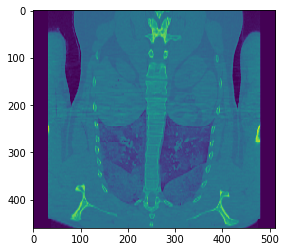

In [5]:
plt.imshow(cube[:, 310, :])

In [6]:
cube_ud = cube[::-1,...]

In [10]:
cube_ud[0].mean()

205.5558090209961

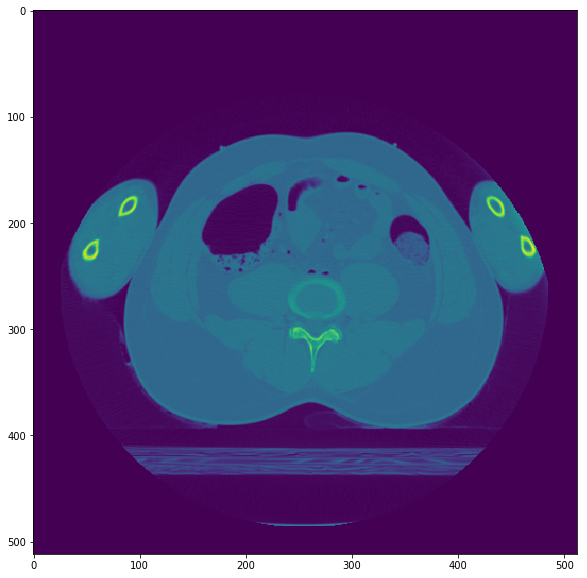

In [24]:
plt.imshow(cube_ud[-1,:,:])
# plt.imshow(cube_ud[:,k,:])
# plt.imshow(cube_ud[:,:,k])

In [12]:
cube.shape

(460, 512, 512)

In [25]:
np.save('cube-full-460-512-512.npy', cube_ud) # full size ~240MB

In [13]:
image.dtype

dtype('int16')

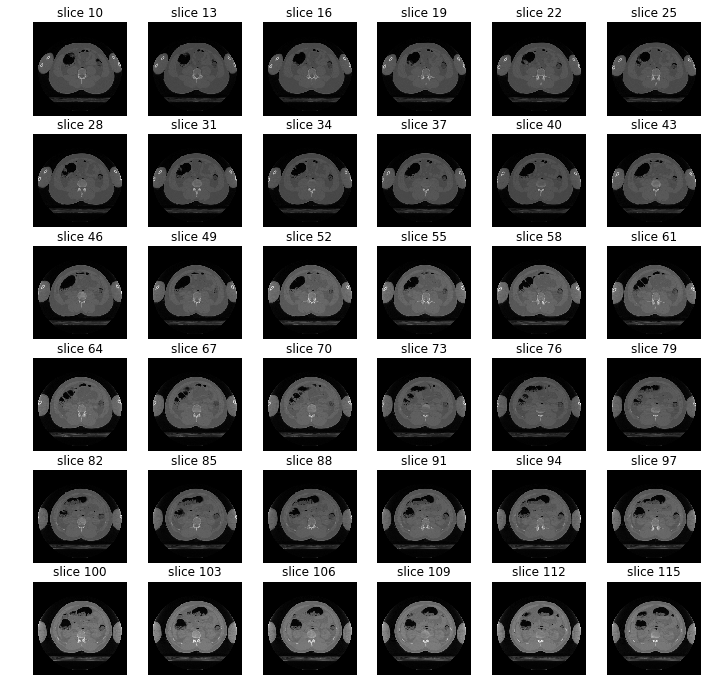

In [14]:
def sample_stack(stack, rows=6, cols=6, start_with=10, show_every=3):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind],cmap='gray')
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

sample_stack(cube)

In [15]:
z = np.load('3d_numpy_array.npy')

In [16]:
plt.imsave('ff.png', z[124], cmap='viridis')

In [96]:
from PIL import Image
pil_img = Image.fromarray(z[124])
pil_img.save('124.png')

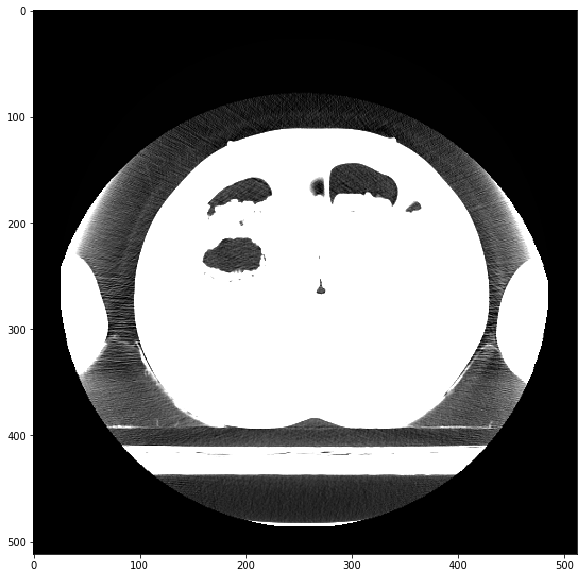

In [95]:
plt.imshow(pil_img)

In [108]:
im124 = Image.open('124.png')
arr124 = np.array(im124)

In [109]:
np.allclose(z[124], im124)

False

In [110]:
bools = z[124] == im124

In [111]:
np.where(bools == False)

(array([ 22,  22,  22, ..., 485, 486, 486]),
 array([226, 227, 228, ..., 291, 308, 309]))

In [112]:
arr124.dtype

dtype('int32')

In [114]:
len(np.where(bools == False)[0])

170413

In [17]:
z = np.load('3d_numpy_array.npy')

In [18]:
z.shape

(460, 512, 512)

In [15]:
z_reduced = z[::8, ::8, ::8]
np.save('3d_numpy_array_reduced-58-64-64.npy', z_reduced)
z_reduced.shape

(58, 64, 64)

In [50]:
z_reduced = np.zeros((64, 64, 64))
z_reduced[2:-2, 2:-2, 2:-2] = z[4:64, 228:288, 228:288] # just some (60, 60, 60) slice / kernel
np.save('densed-64-64-64.npy', z_reduced)
z_reduced.shape

(64, 64, 64)

In [12]:
x = np.arange(10)
x[::2].shape()

TypeError: 'tuple' object is not callable

In [25]:
z[:64, 128:180, 128:180].shape

(64, 52, 52)

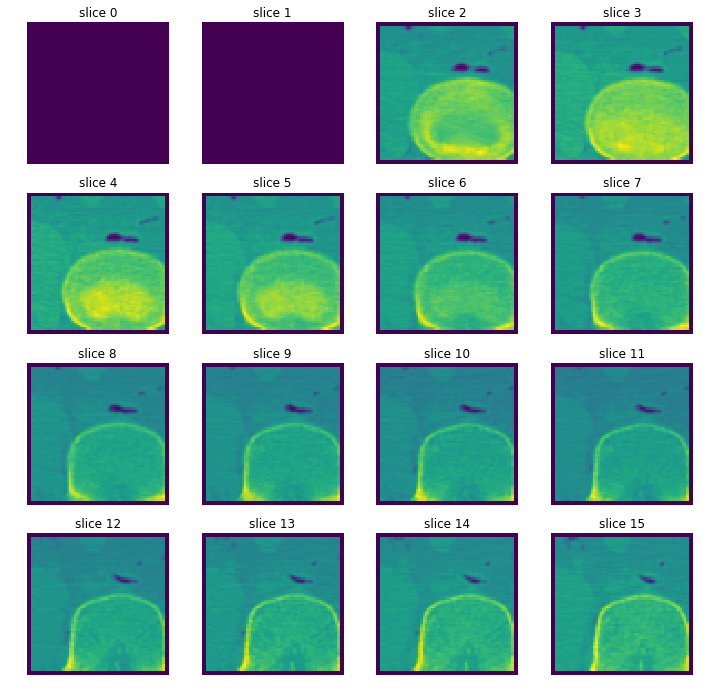

In [51]:
def sample_stack(stack, rows=4, cols=4, start_with=0, show_every=1):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind],cmap='viridis')
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()
    
sample_stack(z_reduced)

In [35]:
512/2 + 32

288.0

In [43]:
z_reduced[0]

array([[ 879,  842,  828, ...,  973,  983, 1032],
       [ 848,  777,  770, ...,  931,  932,  959],
       [ 842,  669,  577, ..., 1016, 1002, 1027],
       ...,
       [1077, 1056, 1042, ..., 1322, 1292, 1174],
       [1017, 1071, 1059, ..., 1217, 1124, 1104],
       [1014, 1028, 1038, ..., 1159, 1125, 1110]], dtype=int16)